> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I investigate European Soccer database which built with sqlite database. I used DB browser to browse data. 
It has 7 tables country,league,Match,plyers,players attribute,team and team attribute.
I will answer 2 qusitions 
1- which team has most winning over the time period .
2- Which players had the most penalties.



In [168]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
%matplotlib inline
import sqlite3 as sql

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [139]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
database = "database.sqlite"
connection = sql.connect(database)

In [140]:
query = "select * from player"
df_player = pd.read_sql_query (query , connection)
df_player.head ()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [141]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


In [142]:
df_country = pd.read_sql('SELECT * FROM Country', connection)
df_league = pd.read_sql('SELECT * FROM League', connection)
df_match = pd.read_sql('SELECT * FROM Match', connection)
df_player = pd.read_sql('SELECT * FROM Player', connection)
df_player_Att = pd.read_sql('SELECT * FROM Player_Attributes', connection)
df_team = pd.read_sql('SELECT * FROM Team', connection)
df_team_Att = pd.read_sql('SELECT * FROM Team_Attributes', connection)

In [143]:
#Drop Columns have a null 
df_player_Att.dropna(inplace=True)

In [78]:
df_player_Att.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

In [79]:
sum(df_player_Att.duplicated())

0

In [80]:
sum(df_team.duplicated())

0

In [81]:
df_match.isnull().sum()

id                      0
country_id              0
league_id               0
season                  0
stage                   0
date                    0
match_api_id            0
home_team_api_id        0
away_team_api_id        0
home_team_goal          0
away_team_goal          0
home_player_X1       1821
home_player_X2       1821
home_player_X3       1832
home_player_X4       1832
home_player_X5       1832
home_player_X6       1832
home_player_X7       1832
home_player_X8       1832
home_player_X9       1832
home_player_X10      1832
home_player_X11      1832
away_player_X1       1832
away_player_X2       1832
away_player_X3       1832
away_player_X4       1832
away_player_X5       1832
away_player_X6       1832
away_player_X7       1832
away_player_X8       1832
                    ...  
B365H                3387
B365D                3387
B365A                3387
BWH                  3404
BWD                  3404
BWA                  3404
IWH                  3459
IWD         

In [82]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


In [83]:
df_match.duplicated().sum()

0

In [84]:
#Drope any columns contains missing data
df_match.dropna(axis='columns', inplace=True)

In [85]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [86]:
sum(df_match.duplicated())

0

In [87]:
df_match.shape

(25979, 11)

In [88]:
df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3


In [92]:
#Converting datatype to date in Match table
df_match['date'] = pd.to_datetime(df_match['date'])

In [93]:
#Extract data from Match table
Match_query = "select id as Match_id, country_id, league_id, season, date, match_api_id, home_team_api_id, away_team_api_id, home_team_goal, away_team_goal from Match"

df= pd.read_sql_query(Match_query, connection) 

In [94]:
df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3


In [95]:
df_league.head()

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [96]:
#Joinning Match and League table to have league name
Matchs_df = pd.merge(df ,df_league, on=['country_id'],how='inner')
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id,name
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,1,Belgium Jupiler League
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,1,Belgium Jupiler League
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,1,Belgium Jupiler League
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,1,Belgium Jupiler League


In [97]:
df_team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [98]:
# Joining with team to have teame name and scoores
Matchs_df = Matchs_df.merge(df_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_x,name,id_y,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
1,29,1,1,2008/2009,2008-11-15 00:00:00,492583,9987,9999,1,1,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
2,47,1,1,2008/2009,2008-11-29 00:00:00,492651,9987,9984,3,2,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
3,65,1,1,2008/2009,2008-12-13 00:00:00,492713,9987,9986,1,0,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN
4,94,1,1,2008/2009,2009-01-24 00:00:00,492805,9987,9998,2,0,1,Belgium Jupiler League,1,9987,673.0,KRC Genk,GEN


In [99]:
Matchs_df = Matchs_df.merge(df_team, how='inner', left_on='away_team_api_id', right_on='team_api_id')
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,...,id_y,team_api_id_x,team_fifa_api_id_x,team_long_name_x,team_short_name_x,id,team_api_id_y,team_fifa_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
1,483,1,1,2009/2010,2009-08-30 00:00:00,665353,9987,9993,1,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
2,524,1,1,2010/2011,2010-08-01 00:00:00,838476,9987,9993,2,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
3,759,1,1,2011/2012,2011-07-30 00:00:00,1032694,9987,9993,3,1,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC
4,1014,1,1,2012/2013,2012-10-20 00:00:00,1224064,9987,9993,3,0,...,1,9987,673.0,KRC Genk,GEN,2,9993,675.0,Beerschot AC,BAC


In [100]:
#Drop any columns have a nuul data
Matchs_df.dropna(axis='columns', inplace=True)
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,id_x,name,id_y,team_api_id_x,team_long_name_x,team_short_name_x,id,team_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,1,Belgium Jupiler League,1,9987,KRC Genk,GEN,2,9993,Beerschot AC,BAC
1,483,1,1,2009/2010,2009-08-30 00:00:00,665353,9987,9993,1,1,1,Belgium Jupiler League,1,9987,KRC Genk,GEN,2,9993,Beerschot AC,BAC
2,524,1,1,2010/2011,2010-08-01 00:00:00,838476,9987,9993,2,1,1,Belgium Jupiler League,1,9987,KRC Genk,GEN,2,9993,Beerschot AC,BAC
3,759,1,1,2011/2012,2011-07-30 00:00:00,1032694,9987,9993,3,1,1,Belgium Jupiler League,1,9987,KRC Genk,GEN,2,9993,Beerschot AC,BAC
4,1014,1,1,2012/2013,2012-10-20 00:00:00,1224064,9987,9993,3,0,1,Belgium Jupiler League,1,9987,KRC Genk,GEN,2,9993,Beerschot AC,BAC


In [101]:
#Drop No needs columns 
Matchs_df.drop(columns=['id_y', 'id_x', 'team_api_id_x' ], axis=1, inplace=True)
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_long_name_x,team_short_name_x,id,team_api_id_y,team_long_name_y,team_short_name_y
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC
1,483,1,1,2009/2010,2009-08-30 00:00:00,665353,9987,9993,1,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC
2,524,1,1,2010/2011,2010-08-01 00:00:00,838476,9987,9993,2,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC
3,759,1,1,2011/2012,2011-07-30 00:00:00,1032694,9987,9993,3,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC
4,1014,1,1,2012/2013,2012-10-20 00:00:00,1224064,9987,9993,3,0,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC


In [102]:
Matchs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 17 columns):
Match_id             25979 non-null int64
country_id           25979 non-null int64
league_id            25979 non-null int64
season               25979 non-null object
date                 25979 non-null object
match_api_id         25979 non-null int64
home_team_api_id     25979 non-null int64
away_team_api_id     25979 non-null int64
home_team_goal       25979 non-null int64
away_team_goal       25979 non-null int64
name                 25979 non-null object
team_long_name_x     25979 non-null object
team_short_name_x    25979 non-null object
id                   25979 non-null int64
team_api_id_y        25979 non-null int64
team_long_name_y     25979 non-null object
team_short_name_y    25979 non-null object
dtypes: int64(10), object(7)
memory usage: 3.6+ MB


In [103]:
#Convert date from String to Date data type
Matchs_df['date'] = pd.to_datetime(Matchs_df['date'])
Matchs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 0 to 25978
Data columns (total 17 columns):
Match_id             25979 non-null int64
country_id           25979 non-null int64
league_id            25979 non-null int64
season               25979 non-null object
date                 25979 non-null datetime64[ns]
match_api_id         25979 non-null int64
home_team_api_id     25979 non-null int64
away_team_api_id     25979 non-null int64
home_team_goal       25979 non-null int64
away_team_goal       25979 non-null int64
name                 25979 non-null object
team_long_name_x     25979 non-null object
team_short_name_x    25979 non-null object
id                   25979 non-null int64
team_api_id_y        25979 non-null int64
team_long_name_y     25979 non-null object
team_short_name_y    25979 non-null object
dtypes: datetime64[ns](1), int64(10), object(6)
memory usage: 3.6+ MB


In [104]:
# Merging Team  table with Team attribute talbel to find out team long name Names
df_T_Att = df_team_Att.merge(df_team, left_on='team_api_id', right_on='team_api_id')
df_T_Att.head()

,id_x,team_fifa_api_id_x,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,id_y,team_fifa_api_id_y,team_long_name,team_short_name
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,Medium,55,Press,45,Normal,Cover,49119,434.0,FC Aarau,AAR
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,Medium,44,Press,54,Normal,Cover,49119,434.0,FC Aarau,AAR
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,Medium,70,Double,70,Wide,Cover,39393,77.0,Aberdeen,ABE
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,Medium,47,Press,52,Normal,Cover,39393,77.0,Aberdeen,ABE


In [105]:
# Drop any columns have null values
df_T_Att.dropna(inplace=True)

In [106]:
# I have to convert Birthday to date datatype
df_player_Att['date'] = pd.to_datetime(df_player_Att['date'])

In [126]:
df_player_Att.head()

,id_x_x,player_api_id,player_name_x_x,player_fifa_api_id_x_x,birthday_x_x,height_x_x,weight_x_x,id_x_x,player_name_x_x,player_fifa_api_id_x_x,...,player_fifa_api_id_y_y,birthday_y_y,height_y_y,weight_y_y,id_y_y,player_name_y_y,player_fifa_api_id_y_y,birthday_y_y,height_y_y,weight_y_y
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,...,218353,1992-02-29 00:00:00,182.88,187,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146,2,Aaron Cresswell,189615,...,189615,1989-12-15 00:00:00,170.18,146,2,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163,3,Aaron Doran,186170,...,186170,1991-05-13 00:00:00,170.18,163,3,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198,4,Aaron Galindo,140161,...,140161,1982-05-08 00:00:00,182.88,198,4,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154,5,Aaron Hughes,17725,...,17725,1979-11-08 00:00:00,182.88,154,5,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [151]:
#Megening palyer Atrributes with palyer to get player name
df_player_Att = pd.merge(df_player_Att, df_player, on=['player_api_id'],how='inner')
df_player_Att.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [108]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
sum(df_player_Att.duplicated())

0

In [109]:
df_player_Att.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (What teams has  the most winning over the time period!)

In [51]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
# I have to define which win, lose, or Draw
def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Draw'

Matchs_df['winner']  = Matchs_df[['home_team_goal', 'away_team_goal', 'team_long_name_x', 'team_long_name_y']].apply(winner, axis=1)

In [52]:
Matchs_df.head()

,Match_id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,name,team_long_name_x,team_short_name_x,id,team_api_id_y,team_long_name_y,team_short_name_y,winner
0,1,1,1,2008/2009,2008-08-17,492473,9987,9993,1,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC,Draw
1,483,1,1,2009/2010,2009-08-30,665353,9987,9993,1,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC,Draw
2,524,1,1,2010/2011,2010-08-01,838476,9987,9993,2,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC,KRC Genk
3,759,1,1,2011/2012,2011-07-30,1032694,9987,9993,3,1,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC,KRC Genk
4,1014,1,1,2012/2013,2012-10-20,1224064,9987,9993,3,0,Belgium Jupiler League,KRC Genk,GEN,2,9993,Beerschot AC,BAC,KRC Genk


In [68]:
df_Most_win = Matchs_df['winner'].value_counts()
df_Most_win = df_Most_win[1:11]

Text(0, 0.5, 'Wins')

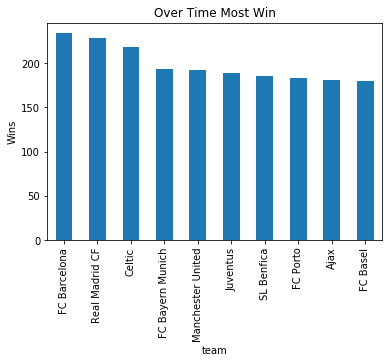

In [70]:
df_Most_win.plot(kind='bar', title='Over Time Most Win')
plt.xlabel('team')
plt.ylabel('Wins')

### Research Question 2  (Which players had the most penalties!)

In [152]:
df_player_Att.head()

,id_x,player_fifa_api_id_x,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,gk_handling,gk_kicking,gk_positioning,gk_reflexes,id_y,player_name,player_fifa_api_id_y,birthday,height,weight
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,11.0,10.0,8.0,8.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,10.0,9.0,7.0,7.0,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [165]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_penalties  = df_player_Att.groupby(['player_api_id', 'player_name'])['penalties'].sum().sort_values(ascending=False)[:5]

In [166]:
df_penalties.head()

player_api_id  player_name       
41269          Alessio Cerci         4314.0
108808         Mario Balotelli       4120.0
41890          Claudio Marchisio     3984.0
26472          Michael Bradley       3813.0
25772          Zdravko Kuzmanovic    3799.0
Name: penalties, dtype: float64

Text(0, 0.5, 'Penalties')

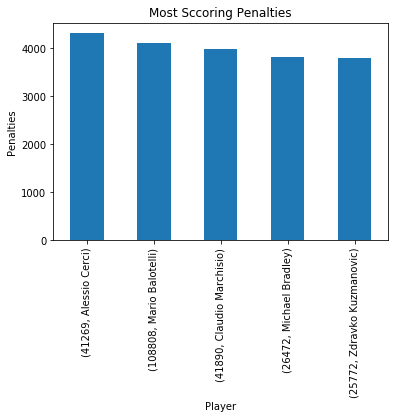

In [173]:
df_penalties.plot(kind='bar', title='Most Sccoring Penalties')
plt.xlabel('Player')
plt.ylabel('Penalties')


<a id='conclusions'></a>
## Limitations

I have encountered some limitations and challenges such as :
-	Name of plyers incomplete .
- Players haven’t a positions, some attributes related to position for example  goal keeper shouldn't be good in drippling.

<a id='conclusions'></a>
## Conclusions

After investigation i found out that 
1- Barcelonca FC was most winnig over the time  by 234 times 
Real Madrid CF in second by  228 times then Celtic by 218 times 
2 - Alessio Cerci was the most plyers scorring penalties then Mario Balottelli in second